## Load Data

In [3]:
import pandas as pd
import numpy as np

FILENAME = "risultati_parziali.xlsx"
df = pd.read_excel(f"../experiment_data/{FILENAME}")
df.head(2)

,Informazioni cronologiche,"What is your current status? (e.g., Bachelor student, Master student, PhD student, Professional developer, Other)","What is your current field of study or work? e.g., Computer Science, Software Engineering, Data Science, Other)",How many years of experience do you have with programming?,"Have you ever used AI-based tools (e.g., GitHub Copilot, ChatGPT) to support your programming tasks?","Have you ever integrated Generative AI tools (e.g., GitHub Copilot, ChatGPT plugins, Cursor...) into your development environment (IDE)?",TAM_PU_1: Using the assistant would improve my efficiency in programming tasks.,TAM_PU_2: Using the assistant could enhance my efficiency in completing programming tasks,TAM_PU_3: Using the assistant would increase my productivity,"TAM_PU_4: I find the idea of having answers adapted to my profile (e.g., experience level, preferred tone) useful",...,TOM_2: I felt that TARS was adapting to the way I think,"TOM_3: TARS provided explanations that reflected the information I gave at the beginning (e.g., my experience level, goals, and preferences).",TOM_4: I would say that TARS successfully built a mental model of me as a user.,"TOM_5: The tone used by TARS matched my selected preference (e.g., friendly, professional, neutral)","TOM_6: The explanations aligned with my main goals (e.g., learning, productivity, understand code...)","TOM_7: TARS respected my preferred explanation style (e.g., short/direct or detailed/technical).","TOM_8: Overall, I felt that TARS adapted its behavior to suit me as an individual user","TOM_9: Compared to other tools, TARS felt more tailored to my needs",Provide your general feedback about the tool,What functionality of the tool would you change and why
0,2025-07-22 10:50:24.072,Master student,Software Engineering,4-5,Always (nearly every working hour),Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Partially Agree,Strongly Agree,Partially Disagree,Il tool risulta ben integrato all'interno di V...,"Probabilmente, per quanto riguarda la code und..."
1,2025-07-22 11:06:02.653,Bachelor student,Computer Science,6 or more years,Frequently (daily),No,Partially Agree,Strongly Agree,Partially Agree,Partially Agree,...,Neutral,Strongly Agree,Partially Agree,Strongly Agree,Strongly Agree,Strongly Agree,Partially Agree,Neutral,"Il tool l'ho trovato semplice da utilizzare, n...",Cambiere visivamente forse il setting degli at...


In [ ]:
import warnings

# Sopprime tutti i FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Sopprime tutti i SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

## Clean DataFrame

In [4]:
#df[df.isna().any(axis=1)]

In [5]:
to_drop_cols = ["Informazioni cronologiche"]
df = df.drop(to_drop_cols, axis=1)

In [6]:
mapper = {
    "What is your current status? (e.g., Bachelor student, Master student, PhD student, Professional developer, Other)": "Current Status",
    "What is your current field of study or work? e.g., Computer Science, Software Engineering, Data Science, Other)": "Field of study",
    "How many years of experience do you have with programming?": "Years of Experience",
    "Have you ever used AI-based tools (e.g., GitHub Copilot, ChatGPT) to support your programming tasks?": "Frequency For AI Tools",
    "Have you ever integrated Generative AI tools (e.g., GitHub Copilot, ChatGPT plugins, Cursor...) into your development environment (IDE)?": "AI Tools in IDE",
    "TAM_PU_1: Using the assistant would improve my efficiency in programming tasks.": "TAM_PU_1",
    "TAM_PU_2: Using the assistant could enhance my efficiency in completing programming tasks": "TAM_PU_2",
    "TAM_PU_3: Using the assistant would increase my productivity": "TAM_PU_3",
    "TAM_PU_4: I find the idea of having answers adapted to my profile (e.g., experience level, preferred tone) useful": "TAM_PU_4",
    "TAM_PE_1: Interacting with the assistant was simple and intuitive": "TAM_PE_1",
    "TAM_PE_2: I had no difficulty understanding how to use the assistant": "TAM_PE_2",
    "TAM_PE_3: I find the tool easy to use": "TAM_PE_3",
    "TAM_PE_4: Was the installation and configuration of the extension easy? ": "TAM_PE_4",
    "TAM_BI_1: As a developer, if I had to work on a file I didn’t write, I would use the TARS tool to understand it first": "TAM_BI_1",
    "TAM_ATU_1: I believe using TARS is generally a good idea": "TAM_ATU_1",
    'TAM_ATU_2: I think integrating Generative AI tools into an IDE is a good idea': 'TAM_ATU_2',
    'TAM_ATU_3: I believe TARS could be a more suitable choice than copy-pasting code in ChatGPT': 'TAM_ATU_3',
    'TLX_MD_1: How mentally demanding did you find this task? (0 = Not at all, 10 = Extremely demanding)': 'TLX_MD_1',
    'TLX_MD_2: Did TARS’s explanations reduce or increase your mental effort while understanding the code? (0 = Greatly reduced effort, 10 = Greatly increased effort)': 'TLX_MD_2',
    'TLX_MD_3: Did you find it mentally exhausting to follow TARS’s reasoning? (0 = Not at all exhausting, 10 = Extremely exhausting)': 'TLX_MD_3',
    'TLX_PD_1: Did you have to perform many manual actions (clicks, scrolling, interactions) to get useful explanations from TARS? (0 = Not at all, 10 = Many actions required)': 'TLX_PD_1',
    'TLX_P_1: How well do you think you understood the code thanks to TARS? (0 = Not at all, 10 = Completely understood)': 'TLX_P_1',
    'TLX_E_1: How much overall effort did you have to put into understanding the code using TARS? (0 = No effort at all, 10 = Extreme effort)': 'TLX_E_1',
    'TLX_E_2: Did using TARS make your task more or less effortful compared to doing it manually? (0 = Much less effortful, 10 = Much more effortful)': 'TLX_E_2',
    'TLX_E_3: Did you have to struggle to interpret or adapt the explanations generated by TARS? (0 = Not at all, 10 = A lot)': 'TLX_E_3',
    'TLX_F_1: Did you feel frustration due to errors, delays, or unexpected behavior from the tool? (0 = Not at all, 10 = Extremely frustrated)': 'TLX_F_1',
    'TLX_F_2: How frustrated, stressed, or discouraged did you feel during the manual version of the task? (0 = Not at all, 10 = Extremely)': 'TLX_F_2',
    'TLX_F_3: How frustrated, stressed, or discouraged did you feel during the TARS-supported version of the task? (0 = Not at all, 10 = Extremely)': 'TLX_F_3',
    'FB_1: Did you find the assistant interface visually appealing?': 'FB_1',
    'FB_2: Did the way the explanations were designed distract you during the task?': 'FB_2',
    'FB_3: Looking back on the experience, which version of the task did you prefer (The manual one or the TARS one)?': 'FB_3',
    'TOM_1: TARS adapted the explanations to my level of programming experience': 'TOM_1',
    'TOM_2: I felt that TARS was adapting to the way I think': 'TOM_2',
    'TOM_3: TARS provided explanations that reflected the information I gave at the beginning (e.g., my experience level, goals, and preferences).': 'TOM_3',
    'TOM_4: I would say that TARS successfully built a mental model of me as a user.': 'TOM_4',
    'TOM_5: The tone used by TARS matched my selected preference (e.g., friendly, professional, neutral)': 'TOM_5',
    'TOM_6: The explanations aligned with my main goals (e.g., learning, productivity, understand code...)': 'TOM_6',
    'TOM_7: TARS respected my preferred explanation style (e.g., short/direct or detailed/technical).': 'TOM_7',
    'TOM_8: Overall, I felt that TARS adapted its behavior to suit me as an individual user': 'TOM_8',
    'TOM_9: Compared to other tools, TARS felt more tailored to my needs': 'TOM_9',
    'Provide your general feedback about the tool': 'General feedback about the tool',
    'What functionality of the tool would you change and why': 'What functionality of the tool would you change and why'
}

reverse_column_mapper = {v: k for k,v in mapper.items()}

df = df.rename(columns=mapper)

## RQ2: Come viene percepito TARS dagli utenti in termini di utilità, facilità d’uso e carico cognitivo?


### Ipotesi nulla (H₀)
Gli utenti non percepiscono differenze significative rispetto a un valore neutro della scala (es. 3 su 0–5, oppure 5 su 0–10) nei punteggi di:

### Variabili di cui si tiene conto
- **TAM**  
  - **Utilità (PU)**: μ > μ₀ → TARS è percepito come utile.  
  - **Facilità d’uso (PE)**: μ > μ₀ → TARS è percepito come facile da usare.  
  - **Attitudine (ATU)**: μ > μ₀ → gli utenti hanno un atteggiamento positivo verso l’uso di TARS.  
  - **Intenzione d’uso (BI)**: μ > μ₀ → gli utenti mostrano una maggiore intenzione a usare TARS.  

- **NASA-TLX**  
  - **Mental Demand (MD)**: μ < μ₀ → TARS riduce il carico mentale.  
  - **Physical Demand (PD)**: μ < μ₀ → TARS riduce il carico fisico.  
  - **Performance (P)**: μ > μ₀ → TARS migliora la performance percepita.  
  - **Effort (E)**: μ < μ₀ → TARS richiede meno sforzo.  
  - **Frustrazione (F)**: μ < μ₀ → TARS riduce la frustrazione.


In [7]:
rq2_columns = [
    'TAM_PU_1', 'TAM_PU_2',
    'TAM_PU_3', 'TAM_PE_1', 'TAM_PE_2', 'TAM_PE_3', 'TAM_PE_4',
    'TAM_BI_1', 'TAM_ATU_1', 'TAM_ATU_2', 'TAM_ATU_3', 'TLX_MD_1',
    'TLX_MD_2', 'TLX_MD_3', 'TLX_PD_1', 'TLX_P_1', 'TLX_E_1', 'TLX_E_2',
    'TLX_E_3', 'TLX_F_1', 'TLX_F_2', 'TLX_F_3', 'FB_1', 'FB_2', 'FB_3',
]

rq_2_df = df[rq2_columns]
rq_2_df.head()

,TAM_PU_1,TAM_PU_2,TAM_PU_3,TAM_PE_1,TAM_PE_2,TAM_PE_3,TAM_PE_4,TAM_BI_1,TAM_ATU_1,TAM_ATU_2,...,TLX_P_1,TLX_E_1,TLX_E_2,TLX_E_3,TLX_F_1,TLX_F_2,TLX_F_3,FB_1,FB_2,FB_3
0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,8,1,2.0,1,3.0,9,2,Partially Disagree,Strongly Disagree,TARS
1,Partially Agree,Strongly Agree,Partially Agree,Neutral,Partially Agree,Strongly Agree,Partially Agree,Strongly Agree,Strongly Agree,Partially Agree,...,6,2,1.0,1,7.0,8,3,Partially Disagree,Neutral,TARS
2,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,10,2,10.0,2,4.0,4,1,Partially Disagree,Partially Agree,TARS
3,Partially Agree,Neutral,Partially Agree,Neutral,Partially Agree,Strongly Agree,Partially Disagree,Neutral,Partially Agree,Strongly Agree,...,6,5,3.0,3,2.0,6,5,Neutral,Partially Disagree,TARS
4,Partially Agree,Partially Agree,Strongly Agree,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Partially Agree,Strongly Agree,...,7,2,8.0,4,2.0,4,2,Partially Disagree,Strongly Disagree,TARS


In [8]:
categorical_columns = [
    "TAM_PU_1",
    "TAM_PU_2",
    "TAM_PU_3",
    "TAM_PE_1",
    "TAM_PE_2",
    "TAM_PE_3",
    "TAM_PE_4",
    "TAM_BI_1",
    "TAM_ATU_1",
    "TAM_ATU_2",
    "TAM_ATU_3",
    "FB_1",
    "FB_2",
]

map_category_to_number = {
    "Strongly Disagree": 0,
    "Partially Disagree": 1,
    "Neutral": 3,
    "Partially Agree": 4,
    "Strongly Agree": 5,
}

rq_2_df[categorical_columns] = rq_2_df[categorical_columns].replace(map_category_to_number)

/var/folders/fx/zsdh_8412glbjpkff1h6xdlh0000gn/T/ipykernel_22581/2549854367.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rq_2_df[categorical_columns] = rq_2_df[categorical_columns].replace(map_category_to_number)
/var/folders/fx/zsdh_8412glbjpkff1h6xdlh0000gn/T/ipykernel_22581/2549854367.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rq_2_df[categorical_columns] = rq_2_df[categorical_columns].replace(map_category_to_number)


### Temporarely data imputation

In [9]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='most_frequent')
rq_2_df = pd.DataFrame(imputer.fit_transform(rq_2_df), columns=rq_2_df.columns)

### Transform Features

In [10]:
rq2_numerical_features = [
    "TAM_PU_1",
    "TAM_PU_2",
    "TAM_PU_3",
    "TAM_PE_1",
    "TAM_PE_2",
    "TAM_PE_3",
    "TAM_PE_4",
    "TAM_BI_1",
    "TAM_ATU_1",
    "TAM_ATU_2",
    "TAM_ATU_3",
    "TLX_MD_1",
    "TLX_MD_2",
    "TLX_MD_3",
    "TLX_PD_1",
    "TLX_P_1",
    "TLX_E_1",
    "TLX_E_2",
    "TLX_E_3",
    "TLX_F_1",
    "TLX_F_2",
    "TLX_F_3",
    "FB_1",
    "FB_2",
]

cols_0_5 = [
    "TAM_PU_1", "TAM_PU_2", "TAM_PU_3",
    "TAM_PE_1", "TAM_PE_2", "TAM_PE_3", "TAM_PE_4",
    "TAM_BI_1",
    "TAM_ATU_1", "TAM_ATU_2", "TAM_ATU_3",
    "FB_1", "FB_2"
]

cols_0_10 = [
    "TLX_MD_1", "TLX_MD_2", "TLX_MD_3",
    "TLX_PD_1",
    "TLX_P_1",
    "TLX_E_1", "TLX_E_2", "TLX_E_3",
    "TLX_F_1", "TLX_F_2", "TLX_F_3"
]

rq_2_df[rq2_numerical_features] = rq_2_df[rq2_numerical_features].apply(pd.to_numeric, errors='coerce')

rq_2_df[cols_0_10] = rq_2_df[cols_0_10] / 2.0
rq_2_df.head()

,TAM_PU_1,TAM_PU_2,TAM_PU_3,TAM_PE_1,TAM_PE_2,TAM_PE_3,TAM_PE_4,TAM_BI_1,TAM_ATU_1,TAM_ATU_2,...,TLX_P_1,TLX_E_1,TLX_E_2,TLX_E_3,TLX_F_1,TLX_F_2,TLX_F_3,FB_1,FB_2,FB_3
0,5,5,5,5.0,5,5,5,5,5,5,...,4.0,0.5,1.0,0.5,1.5,4.5,1.0,1,0,TARS
1,4,5,4,3.0,4,5,4,5,5,4,...,3.0,1.0,0.5,0.5,3.5,4.0,1.5,1,3,TARS
2,5,5,5,5.0,5,5,5,5,5,5,...,5.0,1.0,5.0,1.0,2.0,2.0,0.5,1,4,TARS
3,4,3,4,3.0,4,5,1,3,4,5,...,3.0,2.5,1.5,1.5,1.0,3.0,2.5,3,1,TARS
4,4,4,5,5.0,5,5,5,5,4,5,...,3.5,1.0,4.0,2.0,1.0,2.0,1.0,1,0,TARS


In [11]:
columns = [c for c in rq2_columns if "TAM" in c or "TLX" in c]
rq_2_df[columns].rename(columns=reverse_column_mapper).describe()

,TAM_PU_1: Using the assistant would improve my efficiency in programming tasks.,TAM_PU_2: Using the assistant could enhance my efficiency in completing programming tasks,TAM_PU_3: Using the assistant would increase my productivity,TAM_PE_1: Interacting with the assistant was simple and intuitive,TAM_PE_2: I had no difficulty understanding how to use the assistant,TAM_PE_3: I find the tool easy to use,TAM_PE_4: Was the installation and configuration of the extension easy?,"TAM_BI_1: As a developer, if I had to work on a file I didn’t write, I would use the TARS tool to understand it first",TAM_ATU_1: I believe using TARS is generally a good idea,TAM_ATU_2: I think integrating Generative AI tools into an IDE is a good idea,...,"TLX_MD_2: Did TARS’s explanations reduce or increase your mental effort while understanding the code? (0 = Greatly reduced effort, 10 = Greatly increased effort)","TLX_MD_3: Did you find it mentally exhausting to follow TARS’s reasoning? (0 = Not at all exhausting, 10 = Extremely exhausting)","TLX_PD_1: Did you have to perform many manual actions (clicks, scrolling, interactions) to get useful explanations from TARS? (0 = Not at all, 10 = Many actions required)","TLX_P_1: How well do you think you understood the code thanks to TARS? (0 = Not at all, 10 = Completely understood)","TLX_E_1: How much overall effort did you have to put into understanding the code using TARS? (0 = No effort at all, 10 = Extreme effort)","TLX_E_2: Did using TARS make your task more or less effortful compared to doing it manually? (0 = Much less effortful, 10 = Much more effortful)","TLX_E_3: Did you have to struggle to interpret or adapt the explanations generated by TARS? (0 = Not at all, 10 = A lot)","TLX_F_1: Did you feel frustration due to errors, delays, or unexpected behavior from the tool? (0 = Not at all, 10 = Extremely frustrated)","TLX_F_2: How frustrated, stressed, or discouraged did you feel during the manual version of the task? (0 = Not at all, 10 = Extremely)","TLX_F_3: How frustrated, stressed, or discouraged did you feel during the TARS-supported version of the task? (0 = Not at all, 10 = Extremely)"
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,4.333333,4.166667,4.333333,4.333333,4.222222,4.666667,4.111111,4.611111,4.277778,4.166667,...,1.305556,1.666667,1.527778,3.750000,1.472222,1.750000,1.305556,1.166667,2.694444,1.166667
std,0.594089,1.043185,0.594089,0.766965,1.060275,0.594089,1.323493,0.607685,1.017815,1.248529,...,0.788500,1.084652,1.104433,0.752447,0.716860,1.203549,1.045141,0.804400,1.152221,0.618347
min,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,...,0.500000,0.500000,0.500000,1.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.250000,4.000000,4.000000,4.000000,4.000000,...,1.000000,0.625000,0.500000,3.500000,1.000000,1.000000,0.500000,0.500000,2.000000,0.500000
50%,4.000000,4.000000,4.000000,4.500000,4.500000,5.000000,5.000000,5.000000,4.500000,4.500000,...,1.000000,1.500000,1.500000,4.000000,1.250000,1.500000,1.000000,1.000000,2.750000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.500000,2.375000,2.375000,4.000000,2.000000,2.000000,1.500000,1.500000,3.500000,1.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.500000,4.000000,4.000000,5.000000,3.000000,5.000000,4.000000,3.500000,4.500000,2.500000


### PU SCORE

In [12]:
# PROBABILMENTE INUTILE
from pingouin import cronbach_alpha
PU_columns = ["TAM_PU_1", "TAM_PU_2", "TAM_PU_3"]
alpha, _ = cronbach_alpha(rq_2_df[PU_columns])
print("Cronbach's alpha:", alpha)

Cronbach's alpha: 0.7906976744186047


In [13]:
rq_2_df["PU_score"] = rq_2_df[PU_columns].mean(axis=1)
rq_2_df["PU_score"].describe()

count    18.000000
mean      4.277778
std       0.649283
min       2.333333
25%       4.000000
50%       4.333333
75%       4.666667
max       5.000000
Name: PU_score, dtype: float64

Shapiro-Wilk test: statistic=0.8511606936491988, p-value=0.008833718807533798
I dati si discostano dalla normalità.


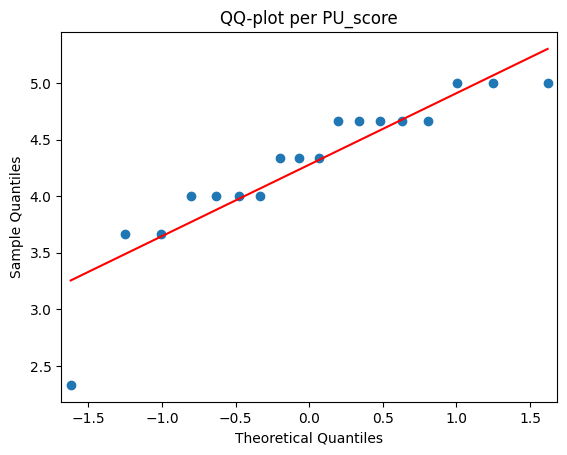

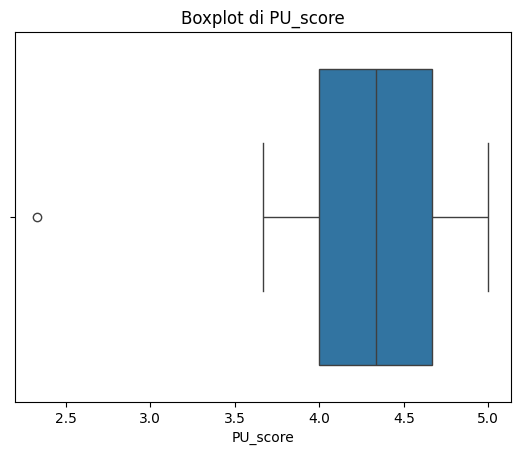

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pu_scores = rq_2_df["PU_score"]


shapiro_stat, shapiro_p = stats.shapiro(pu_scores)
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("I dati si discostano dalla normalità.")


import statsmodels.api as sm
sm.qqplot(pu_scores, line='s')
plt.title("QQ-plot per PU_score")
plt.show()


sns.boxplot(x=pu_scores)
plt.title("Boxplot di PU_score")
plt.show()

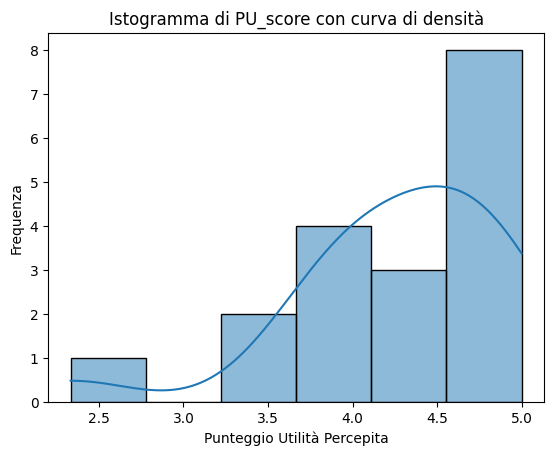

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(pu_scores.to_list(), kde=True)
plt.title("Istogramma di PU_score con curva di densità")
plt.xlabel("Punteggio Utilità Percepita")
plt.ylabel("Frequenza")
plt.show()

### Non avendo distribuzione normale dei dati, non posso usare t-test, quindi sto usando wilcoxon.

In [16]:
stat, p = stats.wilcoxon(pu_scores - 3)

print(f"Wilcoxon test statistic={stat}, p-value={p}")
if p < 0.05: # type: ignore
    print("Rifiuto H0: la mediana è significativamente diversa da 2.5")
else:
    print("Non rifiuto H0: la mediana non è significativamente diversa da 2.5")

Wilcoxon test statistic=2.0, p-value=0.0002574871798673143
Rifiuto H0: la mediana è significativamente diversa da 2.5


### PE score

In [17]:
PE_columns = ["TAM_PE_1", "TAM_PE_2", "TAM_PE_3", "TAM_PE_4"]
rq_2_df["PE_score"] = rq_2_df[PE_columns].mean(axis=1)
rq_2_df["PE_score"].describe()

count    18.000000
mean      4.333333
std       0.669723
min       3.000000
25%       3.812500
50%       4.500000
75%       5.000000
max       5.000000
Name: PE_score, dtype: float64

In [18]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["PE_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("✅ I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.8786518798214216, p-value=0.024777815041874218
Distribuzione non normale


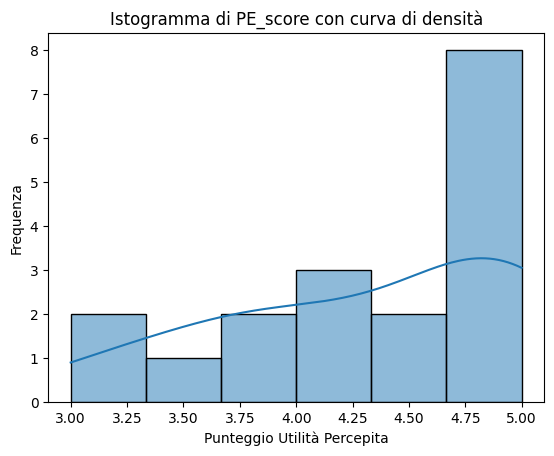

In [19]:
sns.histplot(rq_2_df["PE_score"].to_list(), kde=True)
plt.title("Istogramma di PE_score con curva di densità")
plt.xlabel("Punteggio Utilità Percepita")
plt.ylabel("Frequenza")
plt.show()

In [20]:
stat, p = stats.wilcoxon(rq_2_df["PE_score"] - 3)

print(f"Wilcoxon test statistic={stat}, p-value={p}")
if p < 0.05: # type: ignore
    print("Rifiuto H0: la mediana è significativamente diversa da 3")
else:
    print("Non rifiuto H0: la mediana non è significativamente diversa da 3")

Wilcoxon test statistic=0.0, p-value=0.00027125501835978123
Rifiuto H0: la mediana è significativamente diversa da 3


### ATU

In [21]:
ATU_columns = ["TAM_ATU_1", "TAM_ATU_2", "TAM_ATU_3"]
rq_2_df["ATU_score"] = rq_2_df[ATU_columns].mean(axis=1)
rq_2_df["ATU_score"].describe()

count    18.000000
mean      4.185185
std       0.697542
min       2.333333
25%       3.750000
50%       4.333333
75%       4.666667
max       5.000000
Name: ATU_score, dtype: float64

In [22]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["ATU_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9066352493283838, p-value=0.07506676794670067
I dati non si discostano significativamente dalla normalità.


In [23]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["ATU_score"], 3)
p_value

np.float64(1.4625042406164728e-06)

### Mental Demand

In [24]:
MD_columns = ["TLX_MD_1", "TLX_MD_2", "TLX_MD_3"]
rq_2_df["MD_score"] = rq_2_df[MD_columns].mean(axis=1)
rq_2_df["MD_score"].describe()

count    18.000000
mean      1.824074
std       0.776434
min       0.500000
25%       1.375000
50%       1.750000
75%       2.125000
max       3.666667
Name: MD_score, dtype: float64

In [25]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["MD_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9733348338814227, p-value=0.8575243847912033
I dati non si discostano significativamente dalla normalità.


In [26]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["MD_score"], 3)
p_value

np.float64(6.275008312150411e-06)

### Frustrazione

In [27]:
F_columns = ["TLX_F_1", "TLX_F_2"]
rq_2_df["F_score"] = rq_2_df[F_columns].mean(axis=1)
rq_2_df["F_score"].describe()

count    18.000000
mean      1.930556
std       0.821609
min       0.500000
25%       1.500000
50%       2.000000
75%       2.187500
max       3.750000
Name: F_score, dtype: float64

In [28]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["F_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9494870730169522, p-value=0.4170270600525932
I dati non si discostano significativamente dalla normalità.


In [29]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["F_score"], 3)
p_value

np.float64(3.729774295286669e-05)

### Feedbacks

In [30]:
FB_columns = ["FB_1", "FB_2"]
rq_2_df["FB_score"] = rq_2_df[FB_columns].mean(axis=1)
rq_2_df["FB_score"].describe()

count    18.000000
mean      1.833333
std       1.000000
min       0.500000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: FB_score, dtype: float64

In [31]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["FB_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9169013476437811, p-value=0.1139275953907482
I dati non si discostano significativamente dalla normalità.


In [32]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["FB_score"], 3)
p_value

np.float64(0.00012174346972318643)

### Count the preferences

In [33]:
rq_2_df["FB_3"].value_counts()

FB_3
TARS             16
No Preference     2
Name: count, dtype: int64